In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# AIDS Clinical Trials Group Study 175
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

Прогнозирование беременности с высоким риском
1. Age	- возвраст
2. SystolicBP - верхнее значение артериального давления в мм рт. ст.
3. DiastolicBP -  нижнее значение артериального давления в мм рт. ст.
4. BS - уровень глюкозы в крови выражается в молярной концентрации.
5. BodyTemp - температура тела
6. HeartRate - частота сердечных сокращений
7. RiskLevel - уровень риска (меленький, средний, высокий)


In [79]:
#Загружаем данные в датафрейм
cirrhos = pd.read_csv('Maternal Health Risk Data Set.csv')

#Выводим статистическую информацию
print(cirrhos.describe())


               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [80]:
cirrhos.shape
cirrhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [81]:
cirrhos['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [82]:

def utils_recognize_type(cirrhos, col, max_cat=20):
    if (cirrhos[col].dtype == "O") | (cirrhos[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

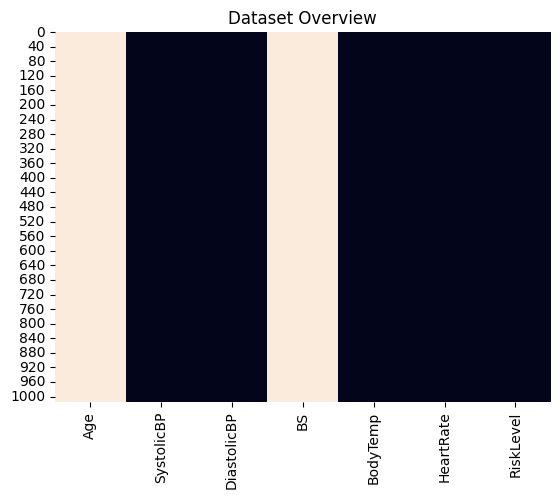

 Categerocial   Numeric   NaN 


In [83]:

dic_cols = {col:utils_recognize_type(cirrhos, col, max_cat=20) for col in cirrhos.columns}


heatmap = cirrhos.isnull()

for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)


sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')

plt.show()

print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

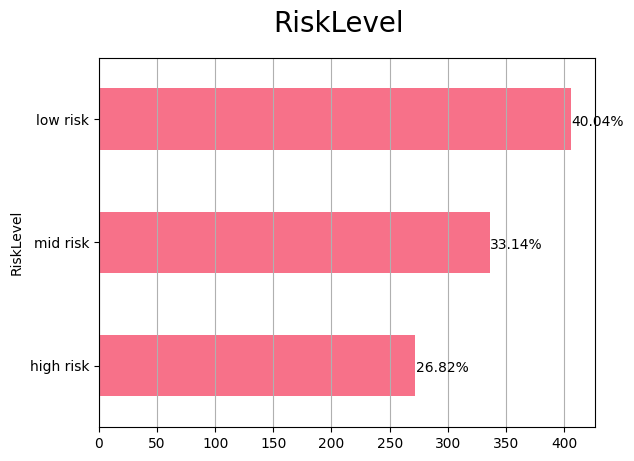

In [84]:


#y = "species"  # вот тут задаем название столбца, по значению в котором и будем группировать
y ="RiskLevel"

ax = cirrhos[y].value_counts().sort_values().plot(kind="barh")


totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()/total)*100, 2))+'%',
            fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)

plt.show()

In [85]:
import pandas as pd
from imblearn.over_sampling import SMOTE

X = cirrhos.drop('RiskLevel', axis=1)  
y = cirrhos['RiskLevel']

# # Инициализация SMOTE
# smote = SMOTE(random_state=42)

# # Применение SMOTE
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Объединение обратно в DataFrame
# cirrhos = pd.DataFrame(X_resampled, columns=X.columns)
# cirrhos['RiskLevel'] = y_resampled
from imblearn.under_sampling import RandomUnderSampler

# Инициализация RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Применение undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Объединение обратно в DataFrame
cirrhos = pd.DataFrame(X_resampled, columns=X.columns)
cirrhos['RiskLevel'] = y_resampled
print(cirrhos['RiskLevel'].value_counts())

RiskLevel
high risk    272
low risk     272
mid risk     272
Name: count, dtype: int64


C:\Users\Ryzen\AppData\Local\Temp\ipykernel_12192\4173174291.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])#зададим данные для графика
C:\Users\Ryzen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


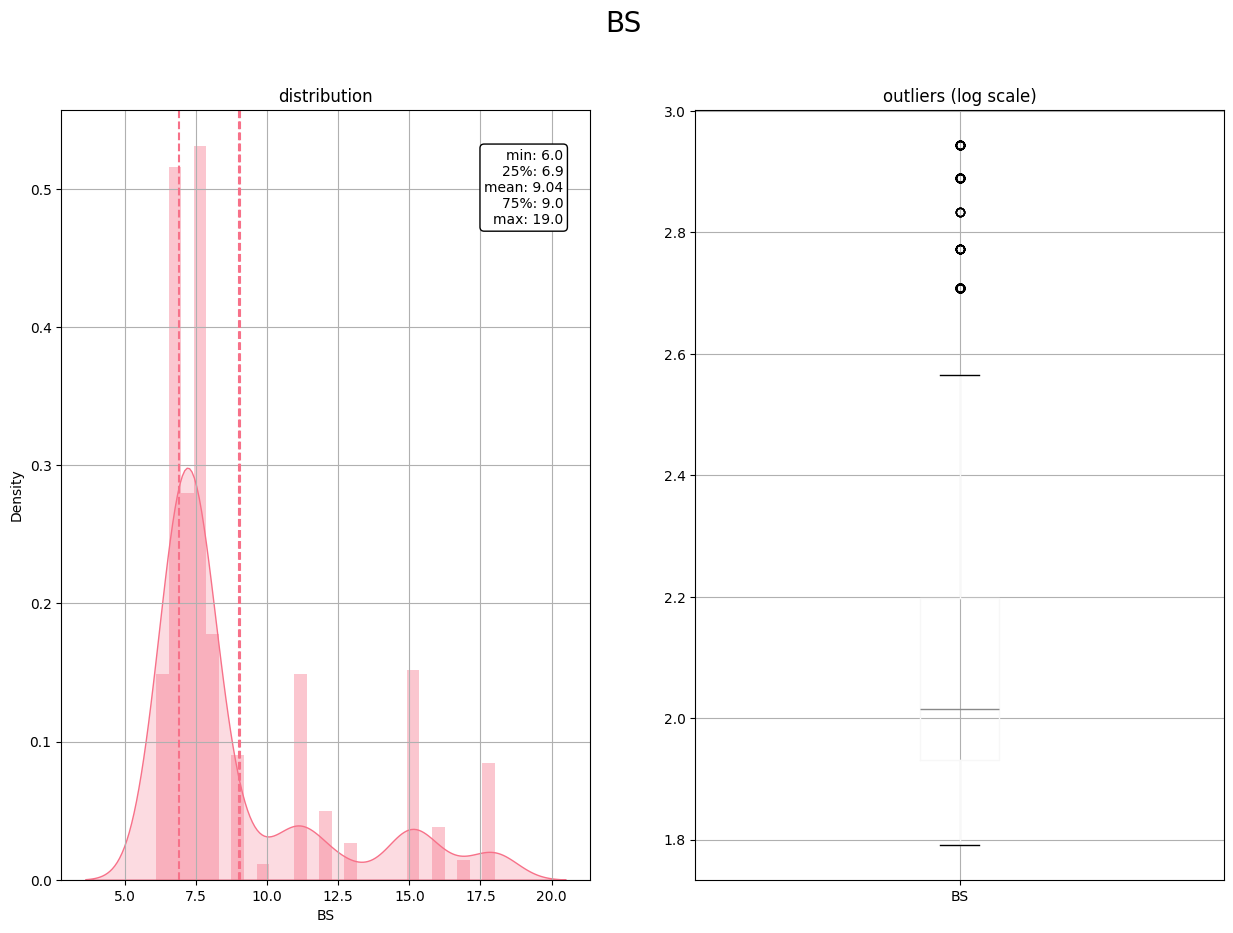

In [86]:

x = "BS"
#x = "culmen_depth_mm"


fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(x, fontsize=20)#задаем заголовок основного рисунка

### distribution
ax[0].title.set_text('distribution')#задаем название
variable = cirrhos[x].fillna(cirrhos[x].mean())#замена отсутствующих значений в датафрейме на средние
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))#вычисляем q-й квантиль заданных данных вдоль указанной оси.
variable = variable[ (variable > breaks[0]) & (variable <
                                               breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])#зададим данные для графика
des = cirrhos[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot

ax[1].title.set_text('outliers (log scale)')#устанавливаем заголовок
tmp_cirrhos = pd.DataFrame(cirrhos[x])
tmp_cirrhos[x] = np.log(tmp_cirrhos[x])
tmp_cirrhos.boxplot(column=x, ax=ax[1])


plt.show()

In [87]:


def show_dist(x, cirrhos):
 
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
    fig.suptitle(x, fontsize=20)
    ### distribution
    ax[0].title.set_text('distribution')
    variable = cirrhos[x].fillna(cirrhos[x].mean())
    breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
    variable = variable[(variable > breaks[0]) & (variable <
                                                  breaks[10])]
    sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True},
                 ax=ax[0])  #Запишем чтобы создать горизонтальную гистограмму
    des = cirrhos[x].describe()


    '''
    Добавим квантильные и средние линии
     '''
    ax[0].axvline(des["25%"], ls='--')
    ax[0].axvline(des["mean"], ls='--')
    ax[0].axvline(des["75%"], ls='--')
    ax[0].grid(True)
    des = round(des, 2).apply(lambda x: str(x))
    box = '\n'.join(
        ("min: " + des["min"], "25%: " + des["25%"], "mean: " + des["mean"], "75%: " + des["75%"], "max: " + des["max"]))
    ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right",
               bbox=dict(boxstyle='round', facecolor='white', alpha=1))
  
    ### boxplot
    ax[1].title.set_text('outliers (log scale)')  #устанавливаем заголовок
    tmp_cirrhos = pd.DataFrame(cirrhos[x])
    tmp_cirrhos[x] = np.log(tmp_cirrhos[x])
    tmp_cirrhos.boxplot(column=x, ax=ax[1])
 
    plt.show()

C:\Users\Ryzen\AppData\Local\Temp\ipykernel_12192\3626621074.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True},
C:\Users\Ryzen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


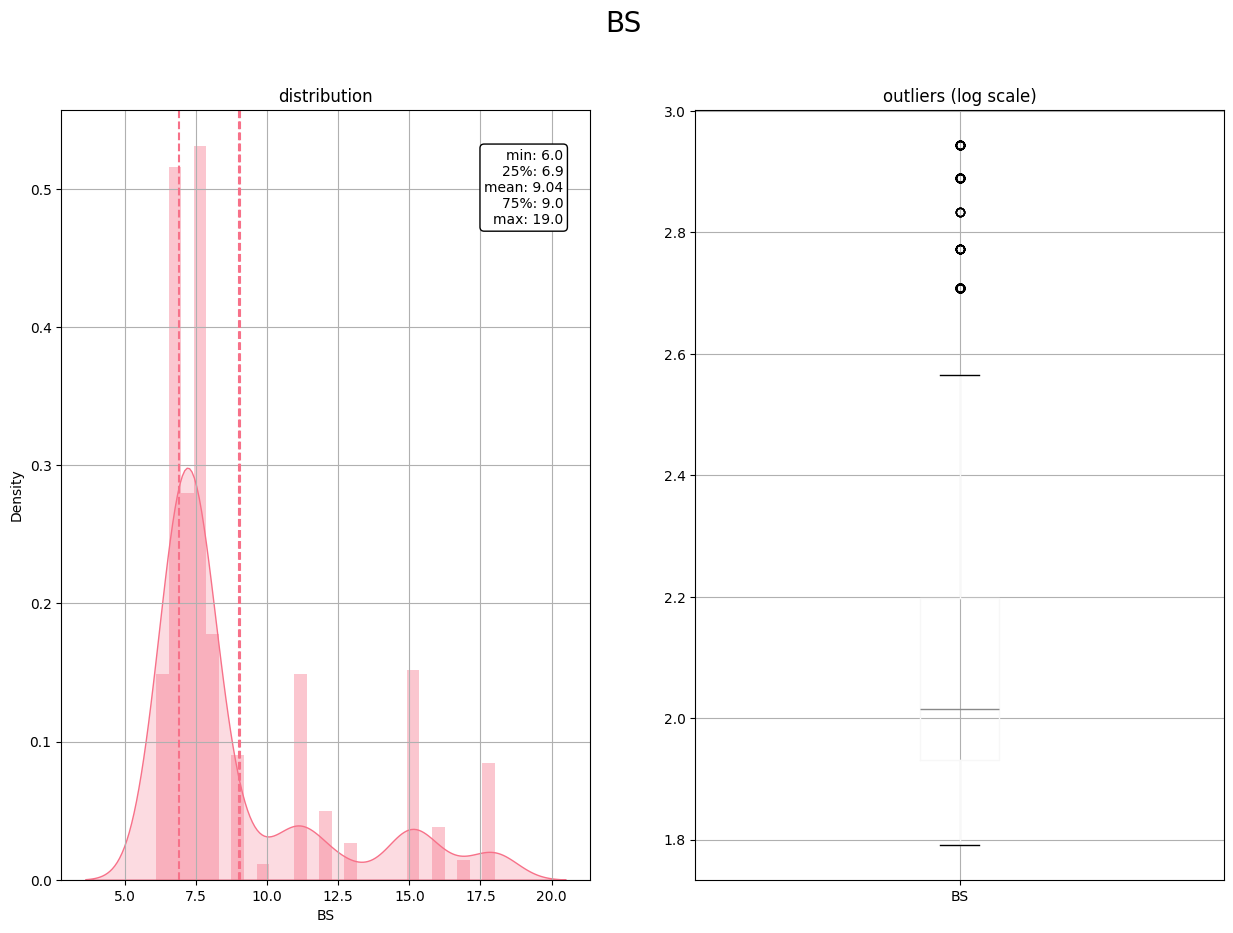

In [88]:

show_dist('BS', cirrhos)

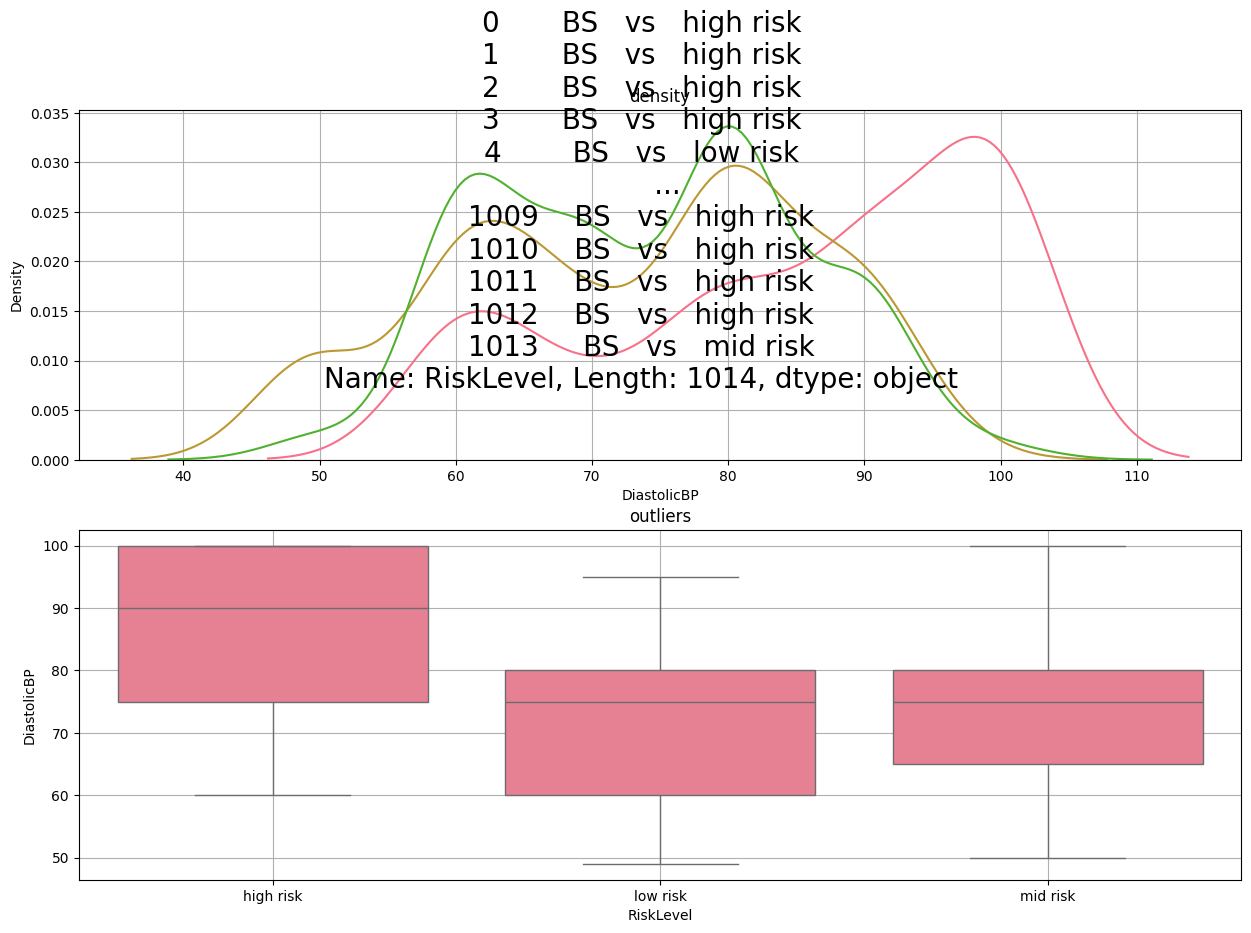

In [89]:


cat, num = "RiskLevel", "DiastolicBP"
fig, ax = plt.subplots(nrows=2, ncols=1,  sharex=False, sharey=False, figsize=(15, 10))# распаковываем  кортеж в переменные figи ax.
fig.suptitle(x+"   vs   "+y, fontsize=20)# получаем объект рисунка и массив подграфиков,где первое число - количество строк,второе - столбцов, sharex, sharey задают нужно ли разделять ось между подграфиками


### distribution
ax[0].title.set_text('density')
for i in cirrhos[cat].unique():  # перебираем все уникальные значения в столбце cirrhos[cat], cat="species"
    sns.kdeplot(cirrhos[cirrhos[cat]==i][num],   label=i, ax=ax[0])#Построим график плотности распределения в столбце num, при условии, что значение в столбце cirrhos[cat] совпадет с i
ax[0].grid(True)#Настроим линии сетки.

### boxplot
ax[1].title.set_text('outliers')#устанавливаем заголовок
sns.boxplot(x=cat, y=num, data=cirrhos, ax=ax[1])#Нарисуем блочную диаграмму, чтобы показать распределения по категориям.


ax[1].grid(True)#Настроим линии сетки.


plt.show()

In [90]:


from sklearn.preprocessing import LabelEncoder

# Используем LabelEncoder для замены категориальных данных
le = LabelEncoder()
cirrhos["RiskLevel"] = le.fit_transform(cirrhos["RiskLevel"])
print(cirrhos)

     Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0     25         130           80  15.00      98.0         86          0
1     35         140           90  13.00      98.0         70          0
2     29          90           70   8.00     100.0         80          0
3     30         140           85   7.00      98.0         70          0
5     23         140           80   7.01      98.0         70          0
..   ...         ...          ...    ...       ...        ...        ...
798   19         120           80   7.00      98.0         70          2
840   50         120           80   7.00      98.0         70          2
71    29         130           70   7.70      98.0         78          2
13    20         120           75   7.01     100.0         70          2
797   43         130           80  18.00      98.0         70          2

[816 rows x 7 columns]


In [91]:

    # При разделении данных на обучающие и тестовые наборы вы должны следовать одному основному правилу:
    #     строки в обучающем наборе не должны также появляться в тестовом наборе.
    #     Это потому, что модель видит целевые значения во время обучения и использует их для понимания явления.
    #     Другими словами, модель уже знает правильный ответ для обучающих наблюдений (.

# split data , 70% - тренировочная выборка, 30% тестовая выборка
dtf_tr, dtf_t = model_selection.train_test_split(cirrhos, test_size=0.3)
# подготавливаем данные в трейне и тесте одинаково
dtf_train = dtf_tr
dtf_test = dtf_t

## print info
# print("X_train shape:", dtf_train.drop("species",axis=1).shape, "| X_test shape:", dtf_test.drop("species",axis=1).shape)
# print("y_train mean:", round(np.mean(dtf_train["species_ind"]),2), "| y_test mean:", round(np.mean(dtf_test["species_ind"]),2))
# print(dtf_train.drop("species",axis=1).shape[1], "features:", dtf_train.drop("species_ind",axis=1).columns.to_list())

In [92]:
dtf_train.shape

(571, 7)

In [93]:
# формируем вспомогательный датасет (где все нужные фичи(столбцы), и нет целевой переменной) и series с целевой переменной. Для трейна
train_x = dtf_train[['Age','SystolicBP','DiastolicBP','BS','BodyTemp', 'HeartRate' ]]
train_y = dtf_train['RiskLevel']

In [94]:
# формируем вспомогательный датасет (где все нужные фичи(столбцы), и нет целевой переменной) и series с целевой переменной. Для теста

test_x = dtf_test[['Age','SystolicBP','DiastolicBP','BS','BodyTemp', 'HeartRate' ]]
test_y = dtf_test['RiskLevel']

In [95]:

# нормируем значения
Y = 'RiskLevel'

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))#приведем Числовые переменные (Numeric Variable) к диапазону от 0 до 1.
X = scaler.fit_transform(train_x)#преобразуем данные таким образом, что их распределение будет иметь среднее значение 0 и стандартное отклонение 1.
'''
 X_train - это весь экземпляр с атрибутами,
 y_train - это метка каждого экземпляра.
'''
train_x_scaled = pd.DataFrame(X, columns=train_x.columns,index=train_x.index)
train_y_scaled = train_y

train_x_scaled.head()# выводим

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
837,0.150000,0.555556,0.705882,0.230769,0.0,0.638554
888,0.633333,0.555556,0.607843,0.384615,0.0,0.975904
510,0.116667,0.222222,0.274510,0.115385,0.6,0.759036
286,0.216667,0.555556,0.803922,0.130769,0.0,0.638554
658,0.250000,0.777778,1.000000,0.461538,0.2,0.879518


C:\Users\Ryzen\AppData\Local\Temp\ipykernel_12192\3626621074.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True},
C:\Users\Ryzen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


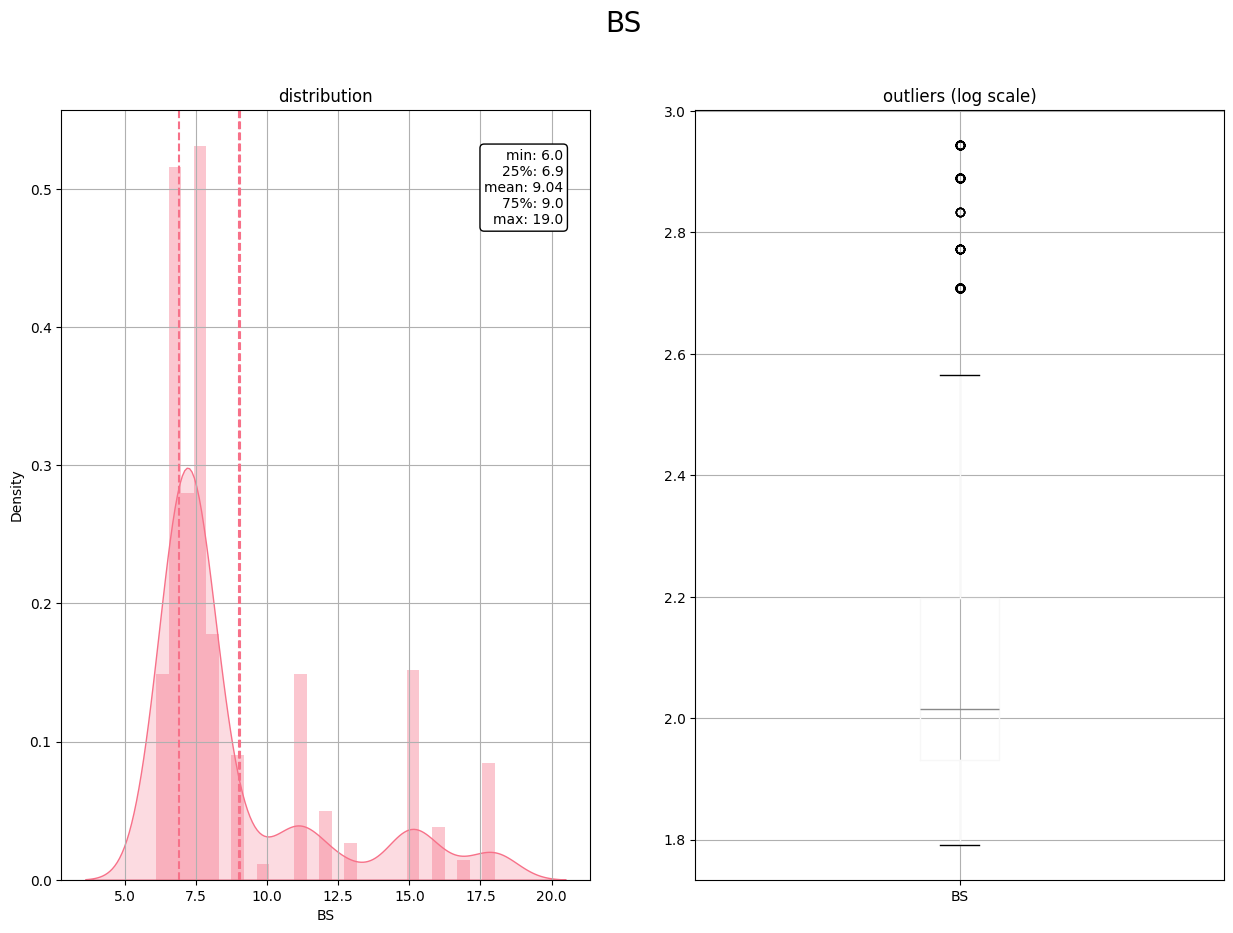

In [96]:
show_dist('BS', cirrhos) #используем ранее созданную нами функцию для отрисовки графиков

C:\Users\Ryzen\AppData\Local\Temp\ipykernel_12192\3626621074.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True},
C:\Users\Ryzen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


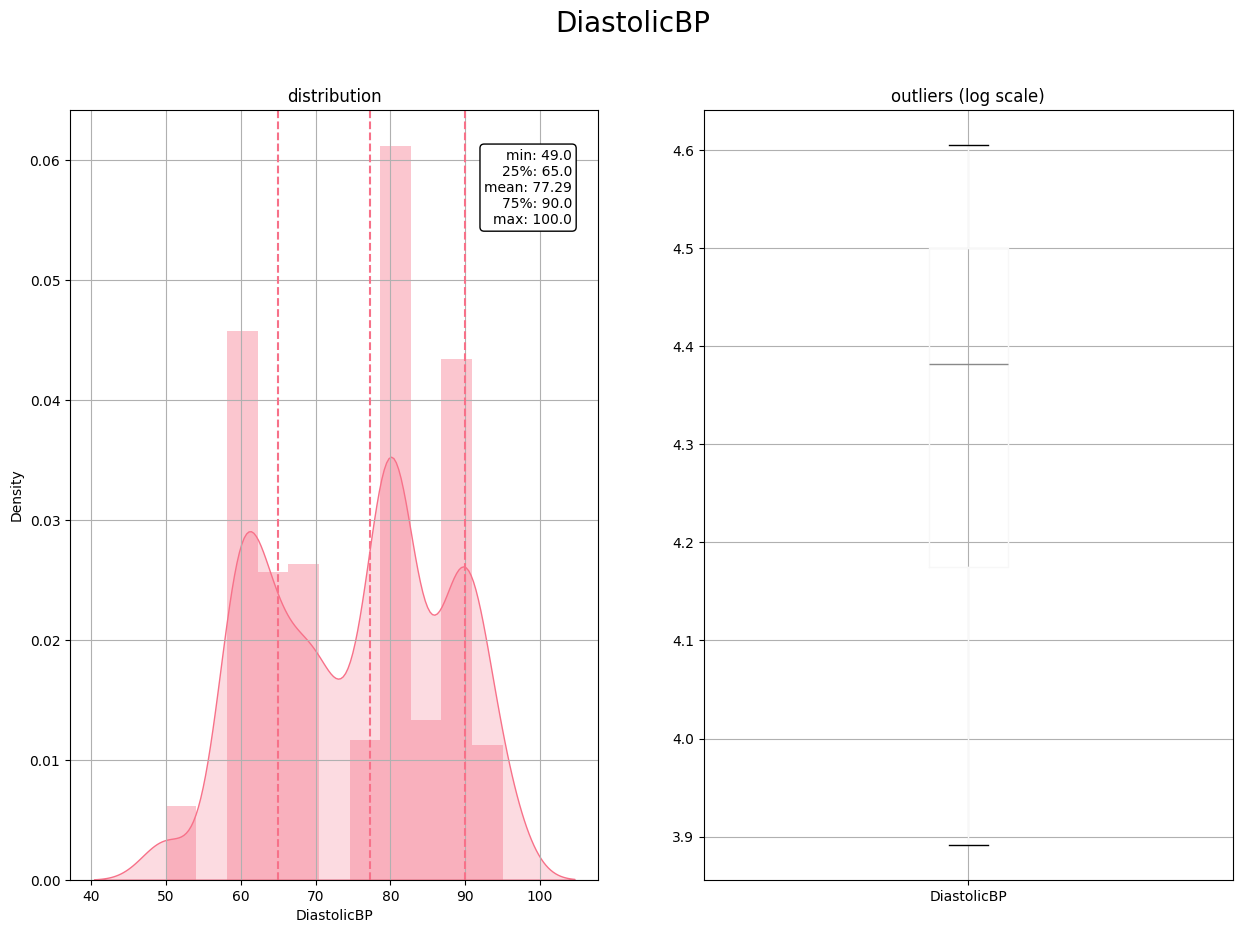

In [97]:
show_dist('DiastolicBP', cirrhos)

In [98]:
X

array([[0.15      , 0.55555556, 0.70588235, 0.23076923, 0.        ,
        0.63855422],
       [0.63333333, 0.55555556, 0.60784314, 0.38461538, 0.        ,
        0.97590361],
       [0.11666667, 0.22222222, 0.2745098 , 0.11538462, 0.6       ,
        0.75903614],
       ...,
       [0.2       , 0.22222222, 0.21568627, 0.11538462, 0.8       ,
        0.63855422],
       [0.33333333, 0.55555556, 0.60784314, 0.13076923, 0.        ,
        0.75903614],
       [0.21666667, 0.66666667, 0.41176471, 0.07769231, 0.        ,
        0.85542169]])

In [99]:
train_x.index

Index([837, 888, 510, 286, 658, 853, 465, 625, 405, 998,
       ...
       938, 539, 747, 195, 719, 800,  96, 135, 291, 706],
      dtype='int64', length=571)

In [100]:
X = scaler.fit_transform(test_x)

test_x_scaled = pd.DataFrame(X, columns=test_x.columns,index=test_x.index )
test_y_scaled = test_y

In [101]:
# '''
# Выбор параметров (фич, features)  — это процесс выбора для обучения модели подмножества параметров из всех параметров датасета.
# Это упрощает обучение модели и уменьшает вероятность переобучения (когда модель слишком сильно адаптируется к обучающим данным и плохо работает вне набора train).

# Вычислим матрицу корреляции, чтобы увидеть, какие параметры коррелируют друг с другом и целевой переменной:
#  '''

# corr_matrix = (cirrhos.drop("Unnamed: 0", axis=1)).copy()
# plt.figure(figsize=(15,7),dpi=100)

# for col in corr_matrix.columns: #зададим условия для столбцов
#  '''
#  corr_matrix принимает входное отношение с числовыми столбцами и вычисляет коэффициент корреляции Пирсона между  каждой парой входных столбцов и возвращает матрицу корреляции в формате триплета.
#  То есть каждая парная корреляция идентифицируется тремя возвращаемыми столбцами:
#  имя первой переменной,  имя второй переменной и значение корреляции пары.
#  Функция также возвращает два дополнительных столбца: number_of_ignored_input_rows и number_of_processed_input_rows.
#  Значение четвертого/пятого столбца указывает количество строк из ввода, которые игнорируются/используются  для вычисления соответствующего значения корреляции.
#  Любая входная пара с NULL, Inf или NaN игнорируется.

# Корреляционная матрица симметрична со значением 1 на всех диагональных элементах
#  '''

# if corr_matrix[col].dtype == "O":
#         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
# corr_matrix = corr_matrix.corr(method="pearson",numeric_only = True)
# '''
# Основная цель Seaborn heatmap — визуализировать correlation matrix  для feature selection для решения задач.
# Vmin и vmax устанавливают нижнюю и верхнюю границы цветовой полосы

# Чтобы изменить цвет heatmap , используют параметр cmap (colormap) sns.heatmap

# Каждая ячейка sns.heatmap отображается по номеру, и если нужно  показать этот номер в ячейке,
# тогда используется sns.heatmap() annot (annotation) Если записать « True » в annot ,
# это значение будет отображаться в каждой ячейке .

# fmt позволяет добавлять строковые (текстовые) значения в ячейку.

# Cbar по умолчанию имеет логическое значение True, если поменять его намFalse, то цветная полоса скрывается.
# '''
# sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, square=True)
# plt.title("pearson correlation")

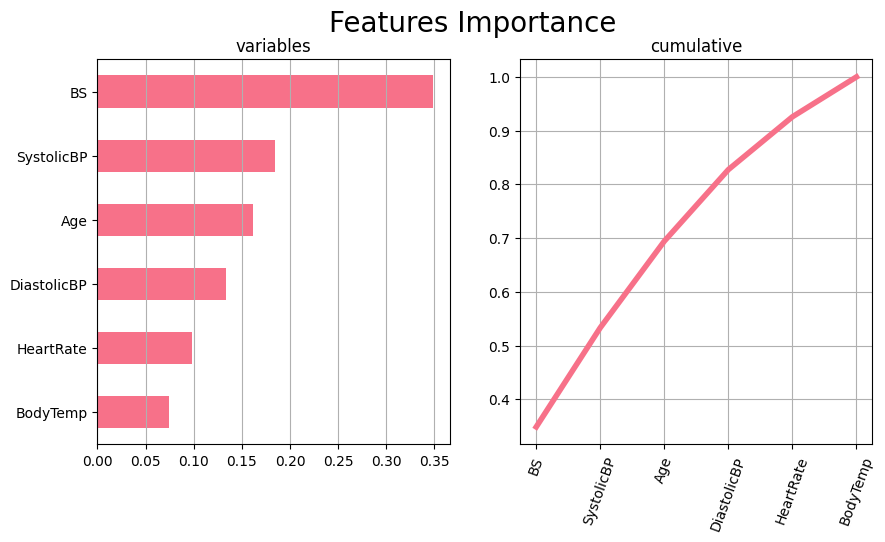

In [102]:

X = train_x_scaled.values
y = train_y_scaled.values
feature_names = train_x_scaled.columns.tolist()# имена столбцов в data.
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                                        criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_ #это оценка, присваиваемая функциям модели машинного обучения,которая определяет, насколько «важной» является функция для прогноза модели.
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,
                                "VARIABLE":feature_names}).sort_values("IMPORTANCE",
                                                                       ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")


## Plot

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(10,5),dpi=100)# распаковываем  кортеж в переменные figи ax.
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')# подпишем график
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')# подпишем график
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')#Настроим линии сетки.

plt.show()

In [103]:

X_train = train_x_scaled[['Age','SystolicBP','DiastolicBP','BS', 'HeartRate' ]]
y_train = train_y_scaled

X_test = test_x_scaled[['Age','SystolicBP','DiastolicBP','BS', 'HeartRate' ]]
y_test = test_y_scaled

In [104]:

## call model
model = ensemble.GradientBoostingClassifier()
## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.15,0.1,0.05],     #весовой коэффициент для поправок по новым деревьям при добавлении в модель
             'n_estimators':[100,250,500],  #количество деревьев, добавленных в модель
             'max_depth':[2,3,4,5],    #максимальная глубина дерева
             'min_samples_split':[2,4,6],    #задает минимальное количество выборок для разделения
             'min_samples_leaf':[1,3,5],     #минимальное количество выборок для формирования листа
             'max_features':[2,3,4],     #квадратный корень из функций обычно является хорошей отправной точкой
             'subsample':[0.7,0.8,0.9,1]}       #образцы, которые будут использоваться для подгонки индивидуального базового файла
## random search(Рандомизированный поиск по гиперпараметрам.)
random_search = model_selection.RandomizedSearchCV(model,
                                                   param_distributions=param_dic, n_iter=10,
                                                   scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_   # здесь теперь хранятся параметры, при которых были получены наилучшие метрики на трейне

Best Model parameters: {'subsample': 0.9, 'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 3, 'learning_rate': 0.05}
Best Model mean accuracy: 0.8002593440122044


In [105]:

## train
## заполняем модель данным из трайн датасетов
model.fit(X_train, y_train)
## test
predicted_prob = model.predict_proba(X_test) #прогнозирование

predicted = model.predict(X_test).astype('int32')

In [106]:
predicted_prob

array([[1.81281979e-02, 5.87336696e-01, 3.94535106e-01],
       [9.74329523e-01, 7.75960486e-03, 1.79108724e-02],
       [9.97020758e-01, 4.90553952e-04, 2.48868804e-03],
       [1.38698886e-02, 9.66829964e-01, 1.93001473e-02],
       [9.98849624e-01, 6.42678102e-04, 5.07698245e-04],
       [5.13075202e-01, 3.24826835e-02, 4.54442115e-01],
       [2.33331324e-01, 2.53517095e-02, 7.41316966e-01],
       [4.28958450e-01, 2.37068259e-01, 3.33973292e-01],
       [9.94349810e-01, 1.84037157e-03, 3.80981850e-03],
       [2.97410679e-02, 6.53304124e-01, 3.16954808e-01],
       [7.03950290e-01, 1.00101415e-02, 2.86039569e-01],
       [9.18158591e-01, 1.85099721e-02, 6.33314370e-02],
       [4.56543132e-02, 9.30128436e-01, 2.42172507e-02],
       [9.18158591e-01, 1.85099721e-02, 6.33314370e-02],
       [9.96867704e-01, 1.13602234e-03, 1.99627392e-03],
       [1.20758495e-02, 1.05036269e-01, 8.82887882e-01],
       [2.85293991e-02, 4.29354687e-01, 5.42115914e-01],
       [9.96810419e-01, 6.16841

In [107]:
# а это истинное значение, кто к какому классу относится
y_test.astype('int32') #astype -  позволяет преобразовывать тип данных существующего столбца данных в набор данны

353    0
417    0
995    0
557    1
114    0
      ..
535    1
143    2
678    0
931    1
363    0
Name: RiskLevel, Length: 245, dtype: int32

In [108]:
## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y_test, predicted)#Оценим точность классификации.

auc = metrics.roc_auc_score(y_test, predicted_prob,  multi_class='ovo',average= "weighted") #возвращаем долю правильно классифицированных выборок.
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.73
Auc: 0.91
Recall (all 1s predicted right): 0.73
Precision (confidence when predicting a 1): 0.73
Detail:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        75
           1       0.66      0.78      0.72        81
           2       0.74      0.54      0.62        89

    accuracy                           0.73       245
   macro avg       0.73      0.74      0.73       245
weighted avg       0.73      0.73      0.72       245



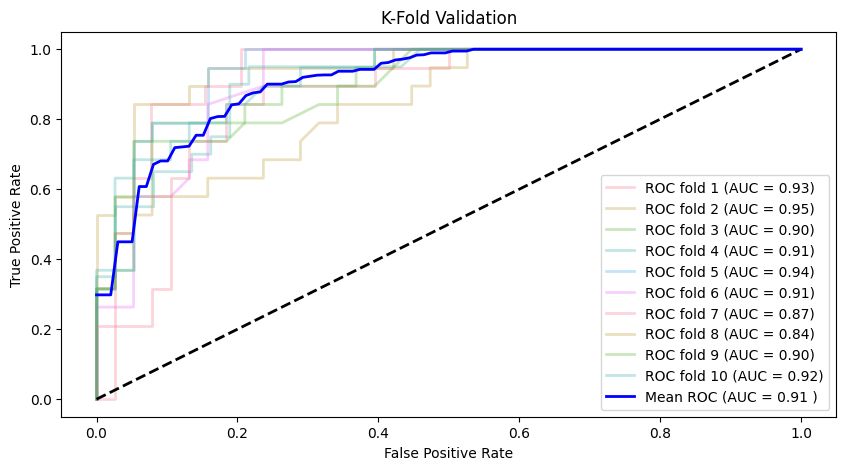

In [109]:
'''
Строим ROC кривые
'''
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure(figsize=(10,5),dpi=100)
i = 1
for train, test in cv.split(X_train, y_train):
    '''
iloc - позволяет получить определенное значение, принадлежащее к строке и столбцу,
используя указанные значения индекса
X_train - это весь экземпляр с атрибутами,
y_train - это метка каждого экземпляра.
train_selected_test - Разделяет массивы / матрицы на случайные тестовые подмножества.

'''
    X_train_selected = X_train.iloc[train]

    y_train_selected = y_train.iloc[train]
    X_train_selected_test = X_train.iloc[test]
    y_train_selected_test = y_train.iloc[test]

    prediction = model.fit(X_train_selected, y_train_selected).predict_proba(X_train_selected_test)
    fpr, tpr, t = metrics.roc_curve(y_train_selected_test, prediction[:, 1], pos_label=1)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
'''
Получим результат
'''
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
'''
построим график

'''
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")

plt.show()

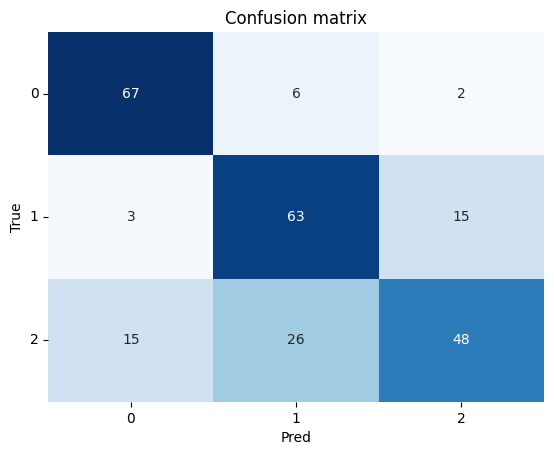

In [110]:
'''
Confusion matrix (Мультиклассовый)
'''

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
'''
построим график

'''

plt.show()

In [111]:
'''
Вспомогательная функция для построения confusion matrix для каждого класса
'''
def compute_class(ls_res, class_value): # возвращаем строку имен классов
    y_t_class = ls_res.copy().astype(int)
    y_t_class = y_t_class.apply(lambda c: 1 if c  == class_value  else 0)
    return  y_t_class

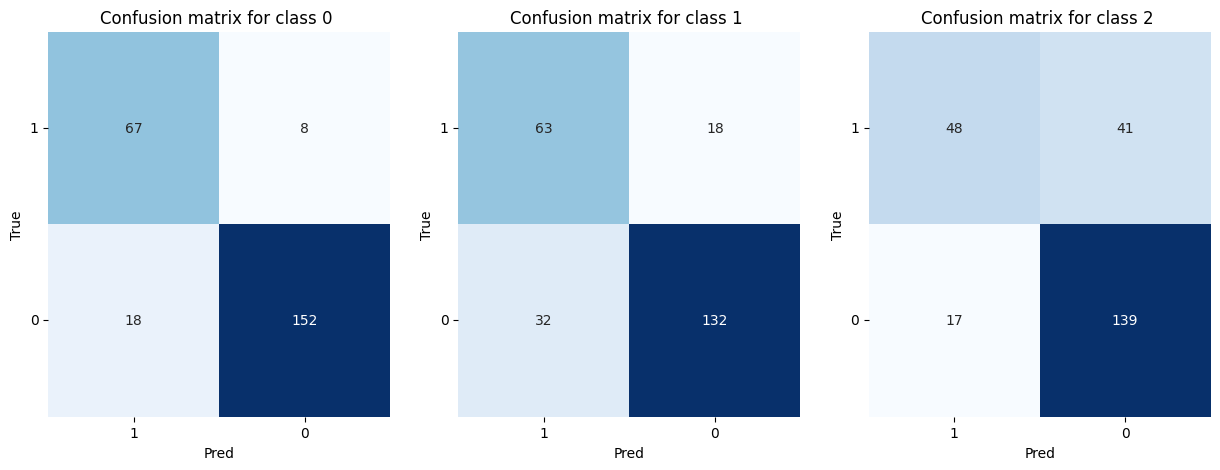

In [112]:


classes = np.unique(y_test).astype(int)
lbs = [1,0]

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,5),dpi=100)

for class_i in classes:
    y_one_class = compute_class(y_test,class_i)
    predicted_one_class = compute_class(pd.Series(predicted.tolist()),class_i)#возвращает строку имен классов
    cm = metrics.confusion_matrix(y_one_class, predicted_one_class, labels=lbs)
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, ax=ax[class_i])
    ax[class_i].set(xlabel="Pred", ylabel="True", title=f"Confusion matrix for class {class_i} ")
    ax[class_i].set_xticklabels(labels=lbs, rotation=0)
    ax[class_i].set_yticklabels(labels=lbs, rotation=0)


plt.show()

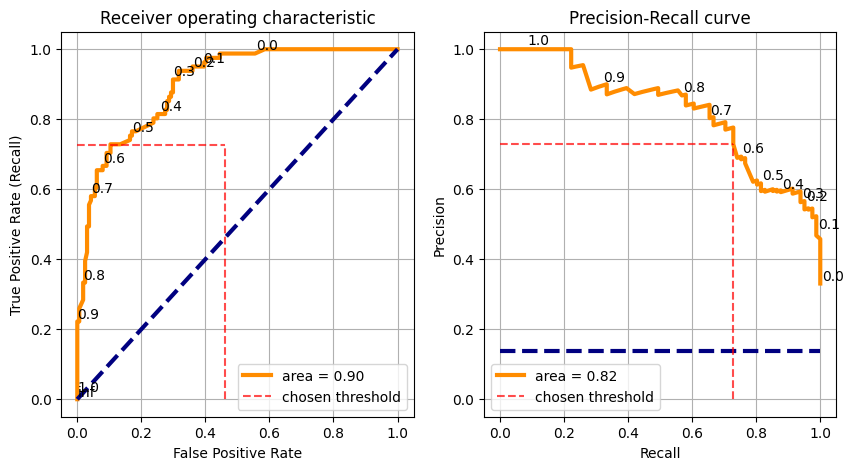

In [113]:


classes = np.unique(y_test)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5),dpi=100)

fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_prob[:, 1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].hlines(y=recall, xmin=0, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[0].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
ax[0].set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
## annotate ROC thresholds


thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax[0].annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
        next
## plot P-R curve


precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, predicted_prob[:,1], pos_label=1)
roc_auc = metrics.auc(recalls, precisions)
ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[1].plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test), (cm[1,0]+cm[1,0])/len(y_test)], linestyle='--', color='navy', lw=3)
ax[1].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[1].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
ax[1].set(xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="lower left")
ax[1].grid(True)
## annotate P-R thresholds

thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax[1].annotate(np.round(t,1), xy=(recalls[i],precisions[i]),
                    xytext=(recalls[i],precisions[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
        next
plt.show()

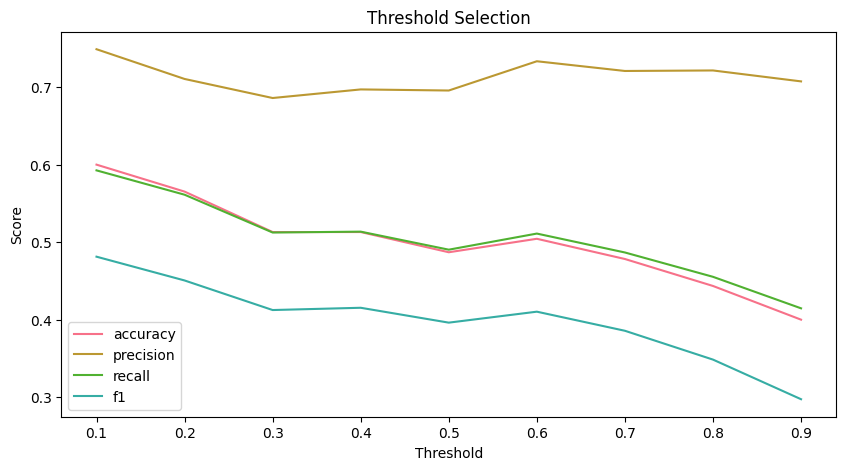

In [114]:
## calculate scores for different thresholds

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5),dpi=100)

dic_scores = {'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(X_train, y_train, test_size=0.2)
predicted_prob = model.fit(XX_train, yy_train).predict_proba(XX_test)[:,1]
thresholds = []
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (predicted_prob > threshold)
    thresholds.append(threshold)
    dic_scores["accuracy"].append(metrics.accuracy_score(yy_test, predicted))
    dic_scores["precision"].append(metrics.precision_score(yy_test, predicted, average='macro', zero_division=1))
    dic_scores["recall"].append(metrics.recall_score(yy_test, predicted, average='macro'))
    dic_scores["f1"].append(metrics.f1_score(yy_test, predicted, average='macro'))

## plot
dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))
ax.set(xlabel='Threshold', ylabel="Score", title="Threshold Selection")
dtf_scores.plot(ax=ax)


plt.show()